In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def DFT(img):
    planes = [np.float32(img), np.zeros(img.shape, np.float32)]
    complexI = cv2.merge(planes)
    
    cv2.dft(complexI, complexI, cv2.DFT_COMPLEX_OUTPUT)
    cv2.split(complexI, planes)
    
    phase = np.arctan(planes[1] / planes[0])
    mag = cv2.magnitude(planes[0], planes[1])
    
    mag = np.log1p(mag)
    cv2.normalize(mag, mag, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    print(type(mag))
    return mag, phase

In [4]:
def DCT(img):
    dct = cv2.dct(np.float32(img))
    dct = cv2.magnitude(dct, dct)
    
    dct = np.log1p(dct)
    cv2.normalize(dct, dct, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    return dct

In [5]:
def block_DCT(img):
    rows = img.shape[0]
    cols = img.shape[1]
    
    dct = np.zeros(img.shape, np.float32)
    
    for i in range(0, rows, 8):
        for j in range(0, cols, 8):
            tmp = cv2.dct(np.float32(img[j:j+8, i:i+8]))
            dct[j:j+8, i:i+8] = cv2.magnitude(tmp, tmp)
            
    dct = np.log1p(dct)
    cv2.normalize(dct, dct, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
    return dct

In [6]:
def main():
    lenna_gray = cv2.imread('./pic/lenna_gray_2.bmp', cv2.IMREAD_GRAYSCALE)
    mag, phase = DFT(lenna_gray)
    dct = DCT(lenna_gray)
    block_dct = block_DCT(lenna_gray)

    plt.figure(figsize=(10, 10))
    plt.subplot(3, 2, 1)
    plt.imshow(lenna_gray, cmap='gray')
    plt.title('Original Image')
    plt.subplot(3, 2, 3)
    plt.imshow(mag, cmap='gray')
    plt.title('Magnitude')
    plt.subplot(3, 2, 4)
    plt.imshow(phase, cmap='gray')
    plt.title('Phase')
    plt.subplot(3, 2, 5)
    plt.imshow(dct, cmap='gray')
    plt.title('DCT')
    plt.subplot(3, 2, 6)
    plt.imshow(block_dct, cmap='gray')
    plt.title('Block DCT')
    plt.tight_layout()
    plt.show()

<class 'numpy.ndarray'>


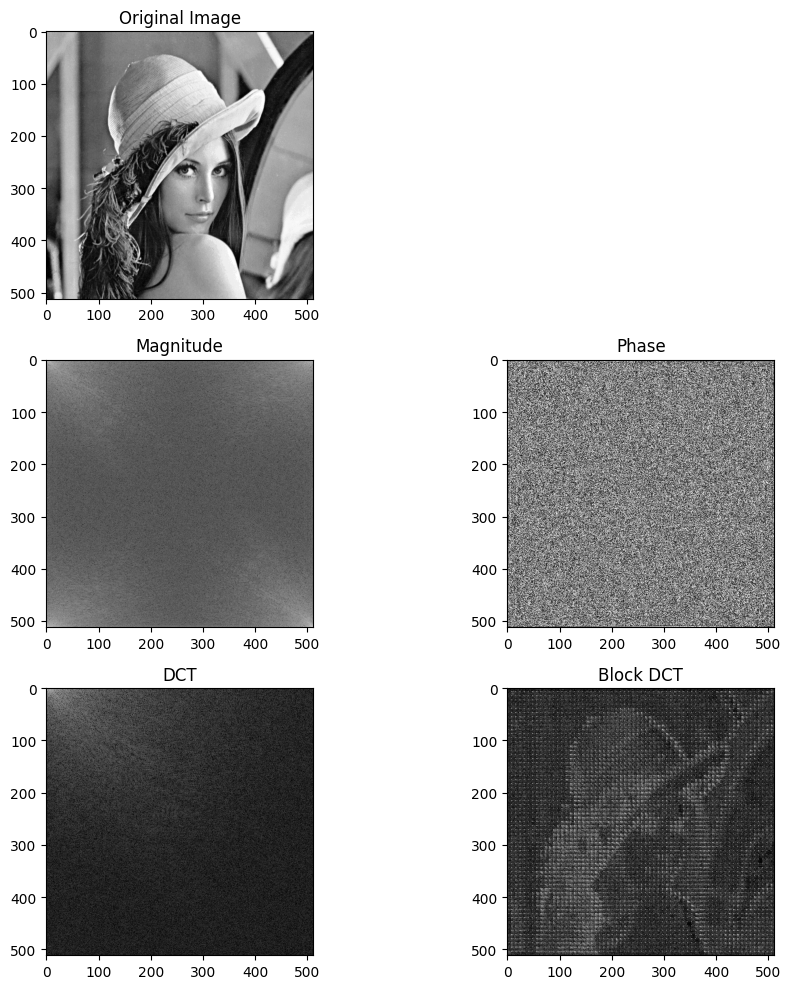

In [7]:
if __name__ == "__main__":
    main()